<a href="https://colab.research.google.com/github/oliverfoster27/Practical-Machine-Learning/blob/master/Week%203/Week3_Homework_CoLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Housing Dataset
Create a regression model that predicts the price of boston house

In [1]:
!wget https://storage.googleapis.com/nicksdemobucket/housing-data.csv

--2019-03-26 01:12:49--  https://storage.googleapis.com/nicksdemobucket/housing-data.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 816 [application/octet-stream]
Saving to: ‘housing-data.csv.3’

housing-data.csv.3  100%[===================>]     816  --.-KB/s    in 0s      

2019-03-26 01:12:49 (16.6 MB/s) - ‘housing-data.csv.3’ saved [816/816]



In [2]:
# Import necessary libraries and get the housing data
import pandas as pd
import numpy as np
df = pd.read_csv('housing-data.csv')
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [3]:
# Featurize and label the dataset
features = df.drop(['price'], axis=1).values
labels = df[['price']].values
print(features.shape, labels.shape)

(47, 3) (47, 1)


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
# Build the NN regression model
model = Sequential()
model.add(Dense(25, activation='relu', input_shape=(3,)))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',
             loss='mean_squared_error',
             metrics=['mean_absolute_error'])

h = model.fit(features, labels, epochs=1000, validation_split=0.2, 
              batch_size=130, verbose=0)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


In [6]:

h.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

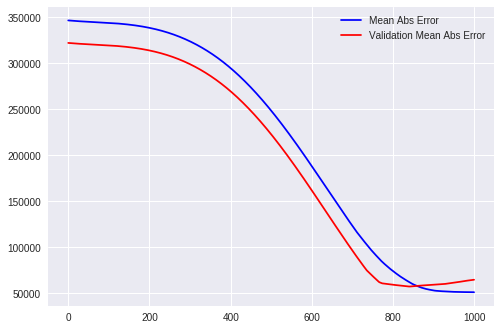

In [7]:
# Plot the history
import matplotlib.pyplot as plt
plt.plot(h.history['mean_absolute_error'], color='b', 
         label='Mean Abs Error')
plt.plot(h.history['val_mean_absolute_error'], color='r', 
         label='Validation Mean Abs Error')
plt.legend()

# Binary Classification
Create a binary classifier for the titanic dataset, will person x survive?

In [8]:
!wget https://storage.googleapis.com/nicksdemobucket/titanic-train.csv

--2019-03-26 01:12:56--  https://storage.googleapis.com/nicksdemobucket/titanic-train.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [application/octet-stream]
Saving to: ‘titanic-train.csv.3’

titanic-train.csv.3 100%[===================>]  59.76K  --.-KB/s    in 0.001s  

2019-03-26 01:12:56 (98.9 MB/s) - ‘titanic-train.csv.3’ saved [61194/61194]



In [9]:
# Get the titanic data
df = pd.read_csv('titanic-train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
# Remove features that seem unecessary off the bat
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [11]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


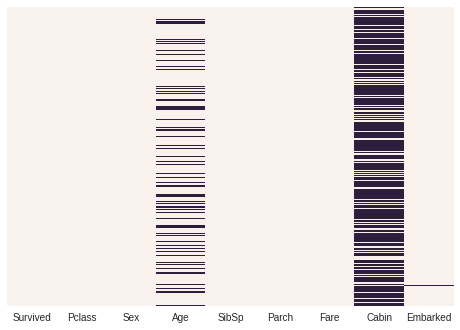

In [12]:
# Visualize the null data in the dataset
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

In [0]:
"""
Since there are only a few missing rows for Embarked we will 
drop the missing rows entirely
"""
df = df.dropna(subset=['Embarked'])

In [0]:
"""
Remove the column "Cabin" from features as a lot of the data is missing and
we already have a proxy for socio-economic status (Pclass)
"""
df = df.drop(['Cabin'], axis=1)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


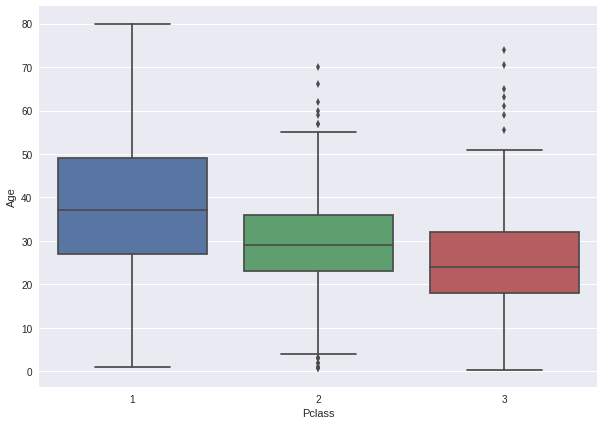

In [15]:
# Investigate a good proxy for age - I suggest PClass
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=df)

In [0]:
"""
Create a function to impute the age based on the average age of each PClass
"""
def impute_age(cols):
  
  Age = cols[0]
  Pclass = cols[1]
  
  if pd.isnull(Age):
    if Pclass==1:
      return 37
    elif Pclass==2:
      return 29
    else:
      return 24
  else:
    return Age

In [0]:
# Apply impute_age to the dataset to fill in the missing age data
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)

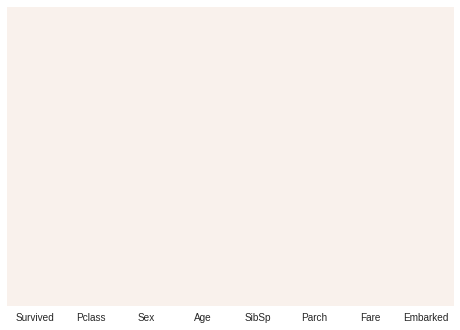

In [18]:
# Show that all missing data is gone
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

In [0]:
# One-Hot-Encode the Sex and Embarked columns
df = pd.concat([df, pd.get_dummies(df['Sex'], prefix='Sex', drop_first=True)],axis=1).drop(['Sex'],axis=1)
df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=True)], axis=1).drop(['Embarked'],axis=1)

In [20]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [21]:
# Now split the data into features and labels
features = df.drop(['Survived'], axis=1)
labels = df[['Survived']].values
print(features.shape, labels.shape)

(889, 8) (889, 1)


In [0]:
# Now that the features are cleaned up - we can train the binary classifier:

model = Sequential()

model.add(Dense(20, activation='relu', input_shape=(8,)))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

h = model.fit(features, labels, epochs=500, validation_split=0.3, verbose=0)

In [23]:
h.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

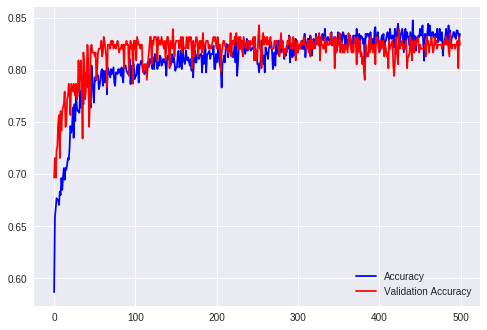

In [24]:
# Plot the accuracy during training
plt.plot(h.history['acc'], color='b', label='Accuracy')
plt.plot(h.history['val_acc'], color='r', label='Validation Accuracy')
plt.legend()

# MNIST
See how well a fully connected Neural Network performs on MNSIT

In [25]:
# Import MNIST dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [26]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


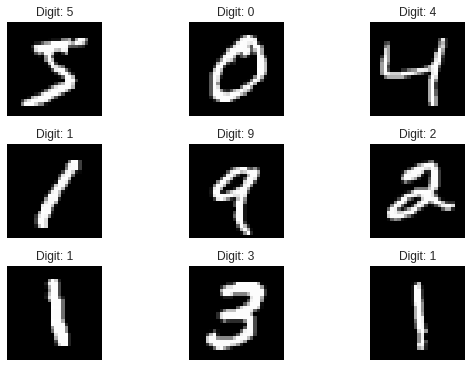

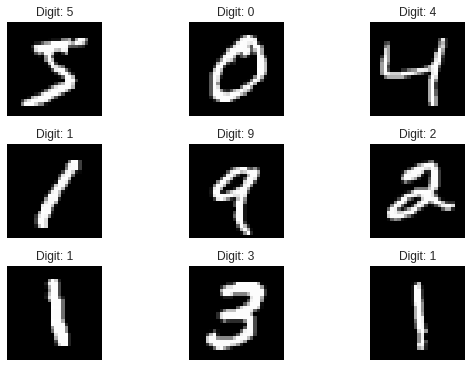

In [27]:
# Visualize the data
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [0]:
# Flatten the input vectors
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the input data
x_train /= 255
x_test /= 255

In [29]:
print(x_train.shape, y_train.shape)

(60000, 784) (60000,)


In [0]:
# Now one-hot encode the labels
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [31]:
print(x_train.shape, y_train.shape)

(60000, 784) (60000, 10)


In [32]:
# Build the NN and train it

model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

h = model.fit(x_train, y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 8s - loss: 0.2177 - acc: 0.9358 - val_loss: 0.1036 - val_acc: 0.9672
Epoch 2/20
 - 8s - loss: 0.0802 - acc: 0.9755 - val_loss: 0.0754 - val_acc: 0.9758
Epoch 3/20
 - 8s - loss: 0.0503 - acc: 0.9844 - val_loss: 0.0601 - val_acc: 0.9811
Epoch 4/20
 - 8s - loss: 0.0357 - acc: 0.9886 - val_loss: 0.0789 - val_acc: 0.9767
Epoch 5/20
 - 9s - loss: 0.0281 - acc: 0.9908 - val_loss: 0.0861 - val_acc: 0.9736
Epoch 6/20
 - 8s - loss: 0.0240 - acc: 0.9922 - val_loss: 0.0713 - val_acc: 0.9801
Epoch 7/20
 - 8s - loss: 0.0173 - acc: 0.9942 - val_loss: 0.0828 - val_acc: 0.9784
Epoch 8/20
 - 8s - loss: 0.0149 - acc: 0.9947 - val_loss: 0.0828 - val_acc: 0.9779
Epoch 9/20
 - 8s - loss: 0.0170 - acc: 0.9941 - val_loss: 0.0810 - val_acc: 0.9793
Epoch 10/20
 - 8s - loss: 0.0155 - acc: 0.9950 - val_loss: 0.0700 - val_acc: 0.9827
Epoch 11/20
 - 8s - loss: 0.0104 - acc: 0.9966 - val_loss: 0.0819 - val_acc: 0.9805
Epoch 12/20
 - 8s - loss: 0.0118 - 

In [33]:
h.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

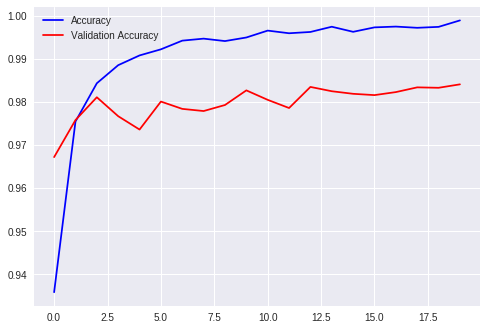

In [34]:
# Plot the accuracy during training
plt.plot(h.history['acc'], color='b', label='Accuracy')
plt.plot(h.history['val_acc'], color='r', label='Validation Accuracy')
plt.legend()